# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base.benchmark_dataset import BenchmarkDataset
from base.model_evaluator import DataSource, DataPredSelection
from base.base_models import BaseModel
from base.optimizers import Optimizer
from m_utils.mtl_approach import MTLApproach
from m_utils.nas_mtl_approach import NAS_MTLApproach
from m_utils.constants import ICAO_REQ, MNIST_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': 'NAS Approach 1 with MNIST dataset with 3 trials and patience and 5 child epochs',
        'tags': ['nas', 'nas_approach_1', 'mnist', '5_child_epochs', 'benchmark'],
        'src_files': ["src"]
    },
    'properties': {
        'approach': NAS_MTLApproach.APPROACH_1,
        'benchmarking': {
            'use_benchmark_data': True,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.MOBILENET_V2,
        'batch_size': 32,
        'n_epochs': 50,
        'early_stopping': 5,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {
        'max_blocks_per_branch': 5,
        'n_child_epochs': 5,
        'controller_epochs': 50,
        'controller_batch_size': 32,
        'n_trials': 50
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 7427
Process ID: 263186
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'NAS Approach 1 with MNIST dataset with 3 '
                               'trials and patience and 5 child epochs',
                'name': 'neural_arch_search',
                'src_files': ['src'],
                'tags': ['nas',
                         'nas_approach_1',
                         'mnist',
                         '5_child_epochs',
                         'benchmark']},
 'nas_params': {'controller_batch_size': 32,
                'controller_epochs': 50,
                'max_blocks_per_branch': 5,
                'n_child_epochs': 5,
                'n_trials': 50},
 'net_train_params': {'base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function preprocess_input 

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [5]:
runner.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,1,0,0,0,0,0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1,0,0,0,0,0,0,0,0,0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,1,0,0,0,0,0,0,0,0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,0,0,0,1,0,0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0,0,0,0,0,0,0,0,1,0


# <font color='red'>Producing Fake Data</font>

# Data Generators

In [6]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 48000 validated image filenames.
Found 12000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 70000

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [7]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

In [8]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

In [9]:
runner.run_neural_architeture_search()

-------------------- run neural architecture search -------------------
Executing neural architectural search
  Memory reseted
++++++++++++++++++++ STARTING NEW TRAIN ++++++++++++++++++++


 ------ Training 1 | Config: {'n_denses_0': 3, 'n_denses_1': 2, 'n_denses_2': 2, 'n_denses_3': 1} -----

Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,108,244
  .. Trainable params: 850,260
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.02625, saving model to training_ckpt/best_model.hdf5


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02625 to 0.00700, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00700 to 0.00653, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00653 to 0.00434, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00434
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99910
  Task  2: n_2             | EER_mean: 0.00180 | EER_interp: 0.00220 | ACC: 0.99810
  Task  3: n_3             | EER_mean: 0.00110 | EER_interp: 0.00100 | ACC: 0.99890
  Task  4: n_4             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  5: n_5             | EER_mean: 0.00280 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01546 to 0.01264, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01264 to 0.00951, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00951 to 0.00549, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00549 to 0.00445, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00120 | ACC: 0.99890
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00140 | ACC: 0.99890
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00260 | ACC: 0.99810
  Task  4: n_4             | EER_mean: 0.00220 | EER_interp: 0.00240 | ACC: 0.9978

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01161 to 0.00928, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00928 to 0.00537, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00537

Epoch 00005: val_loss did not improve from 0.00537
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00120 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00160 | EER_interp: 0.00160 | ACC: 0.99840
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99840
  Task  3: n_3             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99760
  Task  5: n_5             | EER_mean: 0.00140 | EER_interp: 0.00120 | ACC: 0.99870
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01730 to 0.01302, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01302 to 0.00564, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00564 to 0.00556, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00556 to 0.00435, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00220 | ACC: 0.99820
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00150 | ACC: 0.99850
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00000 | ACC: 0.99920
  Task  3: n_3             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99830
  Task  4: n_4             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.9982

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.03692 to 0.00642, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00642

Epoch 00004: val_loss improved from 0.00642 to 0.00420, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00420
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00150 | ACC: 0.99850
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00060 | ACC: 0.99970
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00220 | ACC: 0.99780
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99770
  Task  5: n_5             | EER_mean: 0.00370 | EER_interp: 0.00320 | ACC: 0.99730
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01777 to 0.01015, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01015 to 0.00610, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00610

Epoch 00005: val_loss improved from 0.00610 to 0.00524, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00180 | ACC: 0.99840
  Task  2: n_2             | EER_mean: 0.00230 | EER_interp: 0.00240 | ACC: 0.99770
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00220 | ACC: 0.99790
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00350 | ACC: 0.99710
  Task  5: n_5             | EER_mean: 0.00090 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01533 to 0.00618, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00618

Epoch 00004: val_loss did not improve from 0.00618

Epoch 00005: val_loss improved from 0.00618 to 0.00523, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00150 | ACC: 0.99850
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00220 | ACC: 0.99800
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00140 | ACC: 0.99880
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00290 | ACC: 0.99750
  Task  5: n_5             | EER_mean: 0.00250 | EER_interp: 0.00260 | ACC: 0.99760
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01732 to 0.00908, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00908 to 0.00610, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00610 to 0.00490, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00490 to 0.00452, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00190 | ACC: 0.99830
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00140 | ACC: 0.99880
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99680
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00200 | ACC: 0.9985

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01351 to 0.00798, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00798

Epoch 00004: val_loss improved from 0.00798 to 0.00508, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00508
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99980
  Task  1: n_1             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99860
  Task  3: n_3             | EER_mean: 0.00200 | EER_interp: 0.00220 | ACC: 0.99790
  Task  4: n_4             | EER_mean: 0.00300 | EER_interp: 0.00280 | ACC: 0.99710
  Task  5: n_5             | EER_mean: 0.00200 | EER_interp: 0.00200 | ACC: 0.99800
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02641 to 0.01218, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01218 to 0.00947, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00947 to 0.00693, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00693 to 0.00517, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00070 | EER_interp: 0.00000 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99870
  Task  2: n_2             | EER_mean: 0.00280 | EER_interp: 0.00260 | ACC: 0.99720
  Task  3: n_3             | EER_mean: 0.00110 | EER_interp: 0.00100 | ACC: 0.99890
  Task  4: n_4             | EER_mean: 0.00210 | EER_interp: 0.00230 | ACC: 0.9978

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02611 to 0.00915, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00915 to 0.00834, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00834 to 0.00685, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00685 to 0.00554, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00140 | EER_interp: 0.00160 | ACC: 0.99860
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00120 | ACC: 0.99910
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00230 | ACC: 0.99780
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00150 | ACC: 0.99860
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00190 | ACC: 0.9986

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02362 to 0.01210, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01210 to 0.00453, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00453

Epoch 00005: val_loss did not improve from 0.00453
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99880
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00100 | ACC: 0.99960
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00230 | ACC: 0.99770
  Task  4: n_4             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00190 | ACC: 0.99810
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01226 to 0.00661, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00661

Epoch 00004: val_loss improved from 0.00661 to 0.00543, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00543
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00220 | ACC: 0.99790
  Task  2: n_2             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00160 | ACC: 0.99850
  Task  4: n_4             | EER_mean: 0.00420 | EER_interp: 0.00340 | ACC: 0.99720
  Task  5: n_5             | EER_mean: 0.00270 | EER_interp: 0.00280 | ACC: 0.99720
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01442 to 0.00658, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00658

Epoch 00004: val_loss improved from 0.00658 to 0.00472, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00472
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00260 | EER_interp: 0.00260 | ACC: 0.99740
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00140 | ACC: 0.99880
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  5: n_5             | EER_mean: 0.00100 | EER_interp: 0.00100 | ACC: 0.99900
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02359 to 0.00953, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00953 to 0.00679, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00679

Epoch 00005: val_loss did not improve from 0.00679
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00120 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00230 | EER_interp: 0.00230 | ACC: 0.99770
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99840
  Task  3: n_3             | EER_mean: 0.00270 | EER_interp: 0.00260 | ACC: 0.99730
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99680
  Task  5: n_5             | EER_mean: 0.00350 | EER_interp: 0.00360 | ACC: 0.99650
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01375 to 0.00843, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00843 to 0.00535, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00535

Epoch 00005: val_loss improved from 0.00535 to 0.00408, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00130 | EER_interp: 0.00140 | ACC: 0.99870
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00070 | ACC: 0.99940
  Task  3: n_3             | EER_mean: 0.00150 | EER_interp: 0.00160 | ACC: 0.99850
  Task  4: n_4             | EER_mean: 0.00310 | EER_interp: 0.00320 | ACC: 0.99690
  Task  5: n_5             | EER_mean: 0.00190 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01648 to 0.00963, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00963 to 0.00693, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00693

Epoch 00005: val_loss improved from 0.00693 to 0.00542, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00060 | EER_interp: 0.00080 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00180 | EER_interp: 0.00160 | ACC: 0.99820
  Task  2: n_2             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00150 | ACC: 0.99860
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00200 | ACC: 0.99850
  Task  5: n_5             | EER_mean: 0.00140 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01408 to 0.00666, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00666 to 0.00569, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00569 to 0.00549, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00549 to 0.00541, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00180 | EER_interp: 0.00160 | ACC: 0.99820
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  3: n_3             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99830
  Task  4: n_4             | EER_mean: 0.00230 | EER_interp: 0.00240 | ACC: 0.9977

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss did not improve from 0.01020

Epoch 00003: val_loss improved from 0.01020 to 0.00742, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00742 to 0.00715, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00715 to 0.00404, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00050 | EER_interp: 0.00070 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00140 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  3: n_3             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99830
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00220 | ACC: 0.99810
  Task  5: n_5             | EER_mean: 0.00190 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.05790 to 0.00855, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00855 to 0.00623, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00623

Epoch 00005: val_loss improved from 0.00623 to 0.00475, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00050 | EER_interp: 0.00070 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00170 | EER_interp: 0.00200 | ACC: 0.99820
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00070 | ACC: 0.99930
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00150 | ACC: 0.99860
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99780
  Task  5: n_5             | EER_mean: 0.00090 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02990 to 0.00916, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00916

Epoch 00004: val_loss improved from 0.00916 to 0.00432, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00432
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  2: n_2             | EER_mean: 0.00120 | EER_interp: 0.00000 | ACC: 0.99890
  Task  3: n_3             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  4: n_4             | EER_mean: 0.00230 | EER_interp: 0.00240 | ACC: 0.99770
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99820
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01004 to 0.00710, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00710 to 0.00534, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00534

Epoch 00005: val_loss improved from 0.00534 to 0.00420, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00050 | EER_interp: 0.00070 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00070 | EER_interp: 0.00060 | ACC: 0.99940
  Task  2: n_2             | EER_mean: 0.00110 | EER_interp: 0.00100 | ACC: 0.99890
  Task  3: n_3             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99830
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00260 | ACC: 0.99740
  Task  5: n_5             | EER_mean: 0.00090 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02407 to 0.00726, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00726 to 0.00649, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00649 to 0.00488, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00488 to 0.00469, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00130 | EER_interp: 0.00100 | ACC: 0.99880
  Task  3: n_3             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  4: n_4             | EER_mean: 0.00290 | EER_interp: 0.00270 | ACC: 0.9972

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01877 to 0.01054, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01054 to 0.00635, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00635 to 0.00458, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00458
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00250 | EER_interp: 0.00280 | ACC: 0.99740
  Task  2: n_2             | EER_mean: 0.00150 | EER_interp: 0.00160 | ACC: 0.99850
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00150 | ACC: 0.99860
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99760
  Task  5: n_5             | EER_mean: 0.00240 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01315 to 0.00585, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00585

Epoch 00004: val_loss did not improve from 0.00585

Epoch 00005: val_loss improved from 0.00585 to 0.00467, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00070 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00200 | ACC: 0.99810
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00070 | ACC: 0.99930
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00160 | ACC: 0.99890
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00250 | ACC: 0.99750
  Task  5: n_5             | EER_mean: 0.00150 | EER_interp: 0.00120 | ACC: 0.99860
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss did not improve from 0.01016

Epoch 00003: val_loss improved from 0.01016 to 0.00812, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00812 to 0.00510, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00510 to 0.00444, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00130 | ACC: 0.99880
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00140 | ACC: 0.99890
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00160 | ACC: 0.99850
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00260 | ACC: 0.99730
  Task  5: n_5             | EER_mean: 0.00090 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02032 to 0.00494, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00494

Epoch 00004: val_loss improved from 0.00494 to 0.00453, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00453
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00100 | EER_interp: 0.00080 | ACC: 0.99900
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99860
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00120 | ACC: 0.99910
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99680
  Task  5: n_5             | EER_mean: 0.00110 | EER_interp: 0.00100 | ACC: 0.99890
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01081 to 0.00621, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00621 to 0.00517, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00517 to 0.00472, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00472
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00220 | ACC: 0.99780
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00140 | ACC: 0.99880
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00160 | ACC: 0.99840
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00240 | ACC: 0.99830
  Task  5: n_5             | EER_mean: 0.00100 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01985 to 0.00928, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00928 to 0.00701, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00701 to 0.00482, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00482
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00070 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00200 | EER_interp: 0.00180 | ACC: 0.99800
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00160 | ACC: 0.99840
  Task  4: n_4             | EER_mean: 0.00220 | EER_interp: 0.00200 | ACC: 0.99780
  Task  5: n_5             | EER_mean: 0.00250 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01511 to 0.00595, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00595

Epoch 00004: val_loss improved from 0.00595 to 0.00515, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00515 to 0.00395, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00070 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00210 | ACC: 0.99800
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00140 | ACC: 0.99880
  Task  3: n_3             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99810
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99680
  Task  5: n_5             | EER_mean: 0.00070 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02524 to 0.00950, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00950 to 0.00823, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00823 to 0.00509, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00509
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99680
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00290 | ACC: 0.99750
  Task  5: n_5             | EER_mean: 0.00170 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.03311 to 0.00988, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00988 to 0.00816, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00816 to 0.00615, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00615 to 0.00614, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step-
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99840
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00130 | ACC: 0.99880
  Task  2: n_2             | EER_mean: 0.00440 | EER_interp: 0.00430 | ACC: 0.99560
  Task  3: n_3             | EER_mean: 0.00260 | EER_interp: 0.00250 | ACC: 0.99740
  Task  4: n_4             | EER_mean: 0.00290 | EER_interp: 0.00270 | ACC: 0.997

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02528 to 0.01048, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01048 to 0.00764, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00764 to 0.00753, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00753 to 0.00608, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00030 | EER_interp: 0.00000 | ACC: 0.99980
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00220 | ACC: 0.99790
  Task  2: n_2             | EER_mean: 0.00220 | EER_interp: 0.00240 | ACC: 0.99780
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00110 | ACC: 0.99930
  Task  4: n_4             | EER_mean: 0.00200 | EER_interp: 0.00180 | ACC: 0.9980

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.03408 to 0.01167, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01167 to 0.00614, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00614

Epoch 00005: val_loss improved from 0.00614 to 0.00481, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00060 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99840
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00230 | ACC: 0.99780
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99760
  Task  5: n_5             | EER_mean: 0.00090 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01123 to 0.01005, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01005 to 0.00781, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00781 to 0.00431, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00431 to 0.00386, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00200 | EER_interp: 0.00210 | ACC: 0.99800
  Task  2: n_2             | EER_mean: 0.00100 | EER_interp: 0.00090 | ACC: 0.99900
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00140 | ACC: 0.99870
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00200 | ACC: 0.9983

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01743 to 0.01142, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01142 to 0.00449, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00449 to 0.00436, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00436
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00070 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00140 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00120 | EER_interp: 0.00100 | ACC: 0.99880
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00150 | ACC: 0.99860
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00220 | ACC: 0.99800
  Task  5: n_5             | EER_mean: 0.00190 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.03479 to 0.00741, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00741

Epoch 00004: val_loss improved from 0.00741 to 0.00611, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00611 to 0.00497, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00130 | ACC: 0.99880
  Task  2: n_2             | EER_mean: 0.00120 | EER_interp: 0.00100 | ACC: 0.99880
  Task  3: n_3             | EER_mean: 0.00200 | EER_interp: 0.00220 | ACC: 0.99790
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00240 | ACC: 0.99840
  Task  5: n_5             | EER_mean: 0.00070 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01423 to 0.00769, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00769 to 0.00597, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00597

Epoch 00005: val_loss improved from 0.00597 to 0.00488, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00060 | EER_interp: 0.00000 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99880
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00150 | ACC: 0.99870
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00170 | ACC: 0.99880
  Task  4: n_4             | EER_mean: 0.00170 | EER_interp: 0.00170 | ACC: 0.99830
  Task  5: n_5             | EER_mean: 0.00130 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01204 to 0.00982, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00982

Epoch 00004: val_loss improved from 0.00982 to 0.00531, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00531 to 0.00486, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99960
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99870
  Task  2: n_2             | EER_mean: 0.00230 | EER_interp: 0.00240 | ACC: 0.99780
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00160 | ACC: 0.99840
  Task  4: n_4             | EER_mean: 0.00200 | EER_interp: 0.00180 | ACC: 0.99800
  Task  5: n_5             | EER_mean: 0.00090 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02248 to 0.00717, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00717 to 0.00573, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00573

Epoch 00005: val_loss did not improve from 0.00573
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00060 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00130 | EER_interp: 0.00140 | ACC: 0.99880
  Task  2: n_2             | EER_mean: 0.00320 | EER_interp: 0.00330 | ACC: 0.99680
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00230 | ACC: 0.99780
  Task  4: n_4             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99810
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00160 | ACC: 0.99880
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02293 to 0.00924, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.00924 to 0.00654, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00654 to 0.00428, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00428
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00100 | EER_interp: 0.00100 | ACC: 0.99900
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99870
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00120 | ACC: 0.99930
  Task  3: n_3             | EER_mean: 0.00250 | EER_interp: 0.00240 | ACC: 0.99750
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00220 | ACC: 0.99800
  Task  5: n_5             | EER_mean: 0.00120 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02302 to 0.01094, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01094 to 0.00684, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00684 to 0.00471, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00471
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00190 | EER_interp: 0.00200 | ACC: 0.99810
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00200 | ACC: 0.99850
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00220 | ACC: 0.99780
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00340 | ACC: 0.99660
  Task  5: n_5             | EER_mean: 0.00190 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02035 to 0.01309, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01309 to 0.00676, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00676 to 0.00465, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00465
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00060 | EER_interp: 0.00080 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99910
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  3: n_3             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00220 | ACC: 0.99810
  Task  5: n_5             | EER_mean: 0.00150 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02888 to 0.00511, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00511

Epoch 00004: val_loss improved from 0.00511 to 0.00448, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00448
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 21ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99870
  Task  2: n_2             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  3: n_3             | EER_mean: 0.00140 | EER_interp: 0.00150 | ACC: 0.99860
  Task  4: n_4             | EER_mean: 0.00310 | EER_interp: 0.00320 | ACC: 0.99690
  Task  5: n_5             | EER_mean: 0.00140 | EER_interp: 0.00120 | ACC: 0.99870
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02259 to 0.00946, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00946

Epoch 00004: val_loss improved from 0.00946 to 0.00764, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00764
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99930
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00210 | ACC: 0.99800
  Task  2: n_2             | EER_mean: 0.00510 | EER_interp: 0.00490 | ACC: 0.99520
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00160 | ACC: 0.99900
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00330 | ACC: 0.99680
  Task  5: n_5             | EER_mean: 0.00470 | EER_interp: 0.00460 | ACC: 0.99540
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.02028 to 0.01857, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01857 to 0.00550, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00550 to 0.00450, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00450
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00060 | EER_interp: 0.00000 | ACC: 0.99950
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00220 | ACC: 0.99800
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00140 | ACC: 0.99880
  Task  4: n_4             | EER_mean: 0.00250 | EER_interp: 0.00200 | ACC: 0.99830
  Task  5: n_5             | EER_mean: 0.00150 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01750 to 0.01107, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01107 to 0.00564, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00564

Epoch 00005: val_loss improved from 0.00564 to 0.00457, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00060 | ACC: 0.99970
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00220 | ACC: 0.99780
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00200 | ACC: 0.99830
  Task  3: n_3             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  4: n_4             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99810
  Task  5: n_5             | EER_mean: 0.00090 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01271 to 0.01010, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01010 to 0.00488, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00488

Epoch 00005: val_loss improved from 0.00488 to 0.00369, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00140 | ACC: 0.99860
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00070 | ACC: 0.99940
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00140 | ACC: 0.99870
  Task  4: n_4             | EER_mean: 0.00240 | EER_interp: 0.00240 | ACC: 0.99760
  Task  5: n_5             | EER_mean: 0.00140 | 

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.03281 to 0.00770, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.00770

Epoch 00004: val_loss improved from 0.00770 to 0.00556, saving model to training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00556
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99940
  Task  1: n_1             | EER_mean: 0.00230 | EER_interp: 0.00260 | ACC: 0.99780
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00120 | ACC: 0.99920
  Task  3: n_3             | EER_mean: 0.00180 | EER_interp: 0.00170 | ACC: 0.99820
  Task  4: n_4             | EER_mean: 0.00300 | EER_interp: 0.00280 | ACC: 0.99710
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00180 | ACC: 0.99820
  Task  6: n_6  

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.01651 to 0.01046, saving model to training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01046 to 0.00519, saving model to training_ckpt/best_model.hdf5

Epoch 00004: val_loss did not improve from 0.00519

Epoch 00005: val_loss improved from 0.00519 to 0.00498, saving model to training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00160 | ACC: 0.99860
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00130 | ACC: 0.99880
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00140 | ACC: 0.99880
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00180 | ACC: 0.99870
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00300 | ACC: 0.99740
  Task  5: n_5             | EER_mean: 0.00090 | 

# Create Model with Best Config Found

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [11]:
runner.visualize_model(outfile_path=f"figs/nas/nas_model_approach_2.png")

-------------------- vizualize model -------------------


In [12]:
%%capture
runner.model_summary()

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,203,924
  .. Trainable params: 945,940
  .. Non-trainable params: 2,257,984
Epoch 1/50
1500/1500 [==============================] - 227s 148ms/step - loss: 0.0148 - n_0_loss: 0.0098 - n_1_loss: 0.0116 - n_7_loss: 0.0174 - n_4_loss: 0.0167 - n_2_loss: 0.0136 - n_3_loss: 0.0141 - n_5_loss: 0.0128 - n_6_loss: 0.0150 - n_8_loss: 0.0171 - n_9_loss: 0.0193 - n_0_accuracy: 0.9964 - n_1_accuracy: 0.9957 - n_7_accuracy: 0.9940 - n_4_accuracy: 0.9939 - n_2_accuracy: 0.9959 - n_3_accuracy: 0.9948 - n_5_accuracy: 0.9958 - n_6_accuracy: 0.9949 - n_8_accuracy: 0.9938 - n_9_accuracy: 0.9937 - val_loss: 0.0560 - val_n_0_loss: 0.0080 - val_n_1_loss: 0.1845 - val_n_7_loss: 0.0084 - val_n_4_loss: 0.0378 - val_n_2_loss: 0.0327 - val_n_3_loss: 0.0578 - val_n_5_loss: 0.1774 - val_n_6_loss: 0.0154 - val_n_8_loss: 0.0275 - val_n_9_loss: 0.0103 - val_n_0_accuracy: 0.9978 - v

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
1500/1500 [==============================] - 221s 147ms/step - loss: 0.0057 - n_0_loss: 0.0029 - n_1_loss: 0.0045 - n_7_loss: 0.0061 - n_4_loss: 0.0054 - n_2_loss: 0.0061 - n_3_loss: 0.0053 - n_5_loss: 0.0052 - n_6_loss: 0.0069 - n_8_loss: 0.0060 - n_9_loss: 0.0089 - n_0_accuracy: 0.9991 - n_1_accuracy: 0.9985 - n_7_accuracy: 0.9981 - n_4_accuracy: 0.9984 - n_2_accuracy: 0.9981 - n_3_accuracy: 0.9984 - n_5_accuracy: 0.9981 - n_6_accuracy: 0.9978 - n_8_accuracy: 0.9980 - n_9_accuracy: 0.9975 - val_loss: 0.0085 - val_n_0_loss: 0.0039 - val_n_1_loss: 0.0028 - val_n_7_loss: 0.0041 - val_n_4_loss: 0.0057 - val_n_2_loss: 0.0159 - val_n_3_loss: 0.0086 - val_n_5_loss: 0.0224 - val_n_6_loss: 0.0055 - val_n_8_loss: 0.0080 - val_n_9_loss: 0.0081 - val_n_0_accuracy: 0.9985 - val_n_1_accuracy: 0.9991 - val_n_7_accuracy: 0.9985 - val_n_4_accuracy: 0.9987 - val_n_2_accuracy: 0.9967 - val_n_3_accuracy: 0.9977 - val_n_5_accuracy: 0.9950 - val_n_6_accuracy: 0.9987 - val_n_8_accuracy: 0.9985 -

# Plots

-------------------- draw training history -------------------


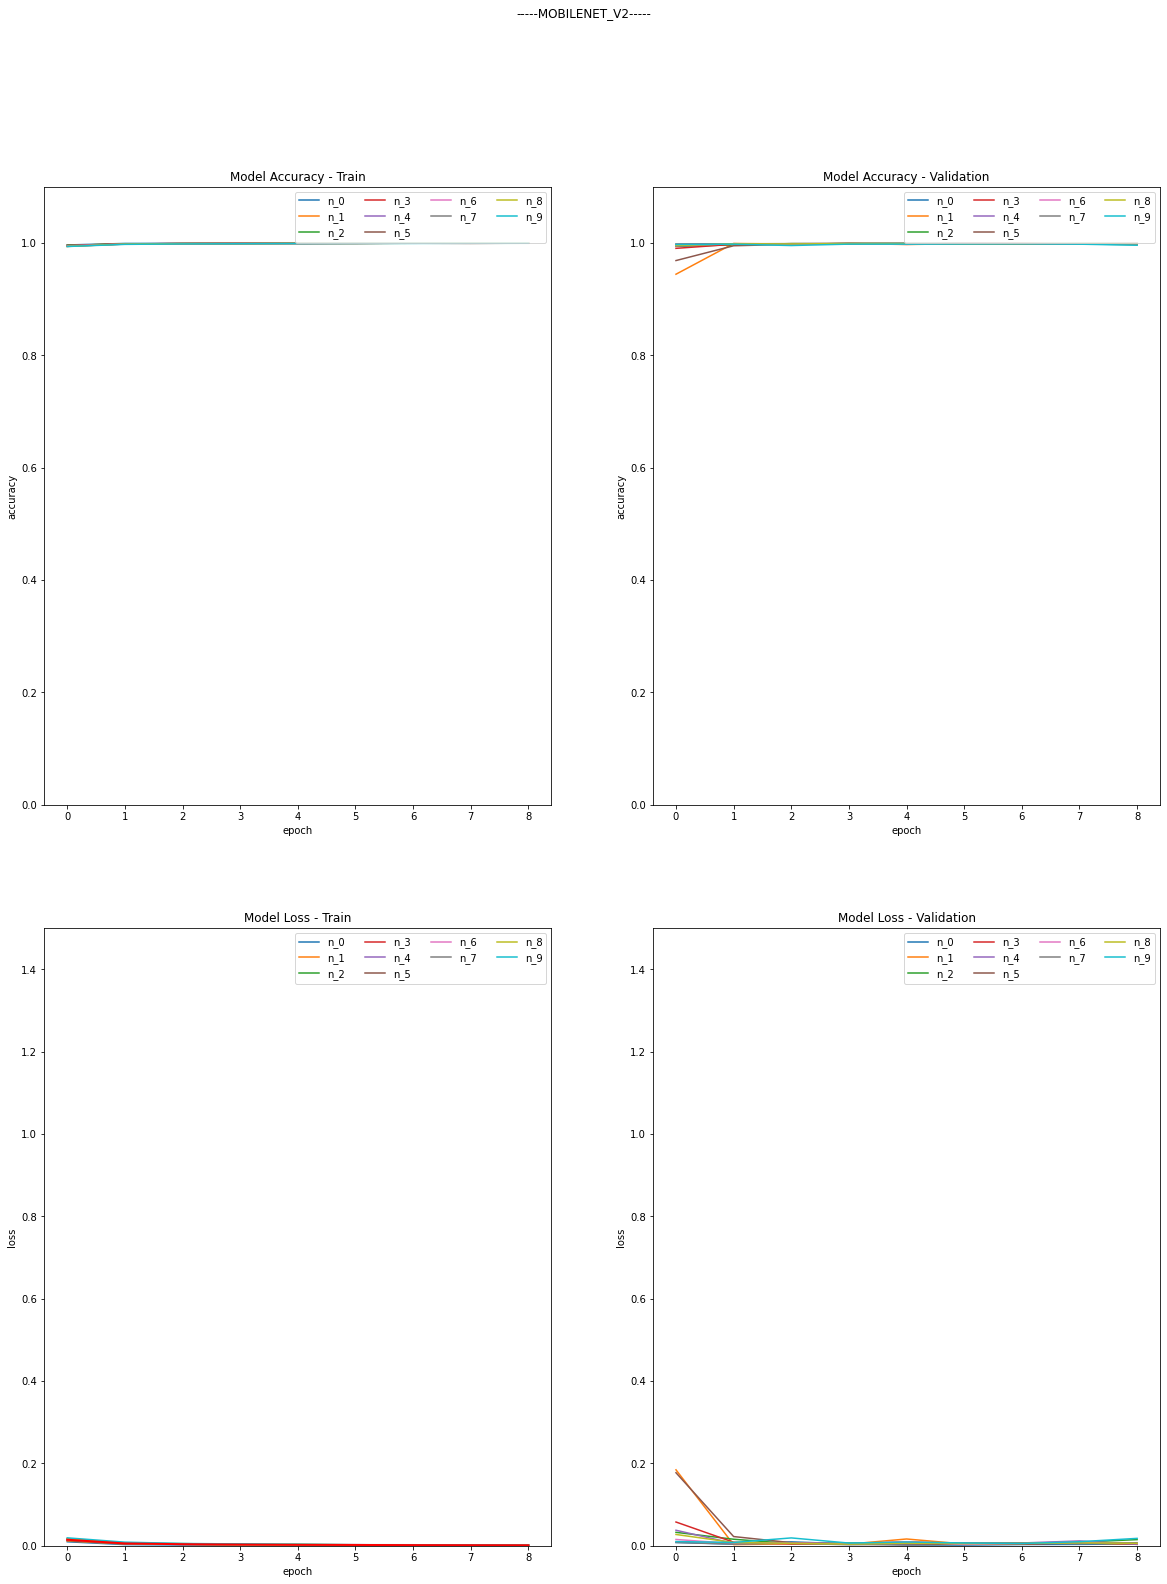

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00230 | EER_interp: 0.00240 | ACC: 0.99770
  Task  1: n_1             | EER_mean: 0.00220 | EER_interp: 0.00220 | ACC: 0.99790
  Task  2: n_2             | EER_mean: 0.00170 | EER_interp: 0.00120 | ACC: 0.99930
  Task  3: n_3             | EER_mean: 0.00160 | EER_interp: 0.00140 | ACC: 0.99880
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99680
  Task  5: n_5             | EER_mean: 0.00110 | EER_interp: 0.00100 | ACC: 0.99890
  Task  6: n_6             | EER_mean: 0.00150 | EER_interp: 0.00160 | ACC: 0.99850
  Task  7: n_7             | EER_mean: 0.00130 | EER_interp: 0.00140 | ACC: 0.99870
  Task  8: n_8             | EER_mean: 0.00270 | EER_interp: 0.00260 | ACC: 0.99730
  Task  9: n_9             | EER_mean: 0.00420 | EER_interp: 0.00400 | ACC: 0.99620
final_EER_mean: 0.21% | final_ACC: 99.8

## Test Split

In [18]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
313/313 [==============================] - 7s 23ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00110 | EER_interp: 0.00110 | ACC: 0.99890
  Task  1: n_1             | EER_mean: 0.00090 | EER_interp: 0.00090 | ACC: 0.99910
  Task  2: n_2             | EER_mean: 0.00250 | EER_interp: 0.00270 | ACC: 0.99750
  Task  3: n_3             | EER_mean: 0.00120 | EER_interp: 0.00110 | ACC: 0.99880
  Task  4: n_4             | EER_mean: 0.00220 | EER_interp: 0.00210 | ACC: 0.99780
  Task  5: n_5             | EER_mean: 0.00140 | EER_interp: 0.00120 | ACC: 0.99860
  Task  6: n_6             | EER_mean: 0.00310 | EER_interp: 0.00300 | ACC: 0.99720
  Task  7: n_7             | EER_mean: 0.00200 | EER_interp: 0.00200 | ACC: 0.99800
  Task  8: n_8             | EER_mean: 0.00240 | EER_interp: 0.00220 | ACC: 0.99760
  Task  9: n_9             | EER_mean: 0.00300 | EER_interp: 0.00300 | ACC: 0.99700
final_EER_mean: 0.19% | final_ACC: 99.8

# Visualize Model Classification

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune


# Testing Network Modification

# Test - Customized Loss Function

# Test - 

In [20]:
import tensorflow as tf
import numpy as np

import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


def __create_rnn_model():
    model = Sequential([
        Dense(4, activation="relu"),
        Dense(64, activation="relu"),
        Dense(4, activation="softmax")
    ])

    model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

    return model

def __preprocess_config(config):
    return np.linalg.norm(config)
    


np.random.seed(2)

X = np.random.rand(400,4)
y = np.random.rand(400,4)

# X = tf.expand_dims(X, axis=0)
# y = np.expand_dims(y, axis=0)

print(X.shape)
print(y.shape)

X_test = np.random.rand(20,4)
y_test = np.random.rand(20,4)

# X_test = tf.expand_dims(X_test, axis=0)
# y_test = tf.expand_dims(y_test, axis=0)

m = __create_rnn_model()

m.fit(X,y, batch_size=32, epochs=5)

loss, acc = m.evaluate(X_test,y_test, batch_size=32)

print(f'loss: {loss}%')
print(f'acc: {round(acc*100,2)}%')

print(f'prediction: {m.predict(np.array(X_test[0]).reshape(1,4))}')

(400, 4)
(400, 4)
Epoch 1/5
13/13 [==============================] - 0s 1ms/step - loss: 2.7668 - accuracy: 0.2975
Epoch 2/5
13/13 [==============================] - 0s 1ms/step - loss: 2.7664 - accuracy: 0.2950
Epoch 3/5
13/13 [==============================] - 0s 1ms/step - loss: 2.7661 - accuracy: 0.2950
Epoch 4/5
13/13 [==============================] - 0s 1ms/step - loss: 2.7658 - accuracy: 0.2950
Epoch 5/5
1/1 [==============================] - 1s 768ms/step - loss: 2.5621 - accuracy: 0.4000
loss: 2.56213116645813%
acc: 40.0%
prediction: [[0.24757019 0.2515973  0.24141431 0.25941816]]


In [21]:
import sys
import random

from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
from tensorflow.keras.layers import Add, Concatenate, Embedding, LSTM, LSTMCell, RNN, Reshape
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import losses, metrics
from tensorflow.keras.models import load_model
from tensorflow.keras.initializers import RandomUniform, HeNormal, GlorotNormal

import tensorflow as tf


def get_weight_initializer(initializer=None, seed=None):
    if initializer is None:
        return HeNormal()
    elif initializer == "lstm":
        return RandomUniform(minval=-0.1, maxval=0.1)
    else:
        return GlorotNormal()


def get_weight_regularizer(regularizer=None, rate=1e-4):
    if regularizer is None:
        return regularizers.l2(rate)
    else:
        return regularizer(rate)


class ControllerRNNController(object):
    def __init__(self,
                 controller_network_name,
                 num_nodes,
                 num_opers,
                 input_x,
                 reward=0,
                 temperature=5.0,
                 tanh_constant=2.5,
                 model_file=None,
                 lstm_cell_units=32,
                 baseline_decay=0.999,
                 opt=Adam(learning_rate=0.00035, decay=1e-3, amsgrad=True)):

        self.controller_network_name = controller_network_name
        self.num_nodes = num_nodes
        self.num_opers = num_opers
        self.reward = reward
        self.input_x = input_x
        self.temperature = temperature
        self.tanh_constant = tanh_constant
        self.lstm_cell_units = lstm_cell_units
        self.opt = opt
        self.model_file = model_file

        self.controller_rnn = self.generate_controller_rnn()
        self.baseline = None
        self.baseline_decay = baseline_decay

        #self.graph = tf.get_default_graph()

    def lstm_reshape(self,
                     inputs,
                     name_prefix,
                     index,
                     reshaped_inputs=None,
                     initial=False):
        name_prefix = "{0}_{1}_{2}".format(self.controller_network_name,
                                           name_prefix, index)
        cell = LSTMCell(
            self.lstm_cell_units,
            kernel_initializer=get_weight_initializer(initializer="lstm"),
            recurrent_initializer=get_weight_initializer(initializer="lstm"))
        if initial:
            x = RNN(
                cell,
                return_state=True,
                name="{0}_{1}".format(name_prefix, "lstm"))(inputs)
        else:
            x = RNN(
                cell,
                return_state=True,
                name="{0}_{1}".format(name_prefix, "lstm"))(
                    reshaped_inputs, initial_state=inputs[1:])
        rx = Reshape(
            (-1, self.lstm_cell_units),
            name="{0}_{1}".format(name_prefix, "reshape"))(x[0])
        return x, rx

    def dense_softmax(self, inputs, num_classes, name_prefix, index):
        name_prefix = "{0}_{1}_{2}".format(self.controller_network_name,
                                           name_prefix, index)
        y = Dense(
            num_classes, name="{0}_{1}".format(name_prefix, "dense"))(inputs)
        y = Activation(
            activation="softmax",
            name="{0}_{1}".format(name_prefix, "softmax"))(y)
        return y

    def generate_controller_rnn(self):
        outputs = []
        controller_input = Input(shape=(1, 1,), name="{0}_{1}".format(self.controller_network_name, "input"))

        for i in range(2, self.num_nodes):
            for o in ["inputL", "inputR", "operL", "operR"]:
                if i == 2 and o == "inputL":
                    _x, _rx, _initial = controller_input, None, True
                else:
                    _x, _rx, _initial = x, rx, False

                if o in ["inputL", "inputR"]:
                    _num_classes = i
                else:
                    _num_classes = self.num_opers

                x, rx = self.lstm_reshape(
                    inputs=_x,
                    name_prefix=o,
                    index=i,
                    reshaped_inputs=_rx,
                    initial=_initial)
                y = self.dense_softmax(
                    inputs=x[0],
                    num_classes=_num_classes,
                    name_prefix=o,
                    index=i)
                outputs.append(y)

        controller_rnn = Model(inputs=controller_input, outputs=outputs)

        if self.model_file is not None and os.path.exists(self.model_file):
            controller_rnn.load_weights(self.model_file)
        return controller_rnn

    def compile_controller_rnn(self):
        def _controller_loss(y_true, y_pred):
            if self.baseline is None:
                self.baseline = 0
            else:
                self.baseline -= (1 - self.baseline_decay) * (self.baseline - self.reward)
            return y_pred * (self.reward - self.baseline)

        def _define_loss(controller_loss):
            outputs_loss = {}
            for i in range(2, self.num_nodes):
                outputs_loss["{0}_{1}_{2}_{3}".format(self.controller_network_name, "inputL", i, "softmax")] = controller_loss
                outputs_loss["{0}_{1}_{2}_{3}".format(self.controller_network_name, "inputR", i, "softmax")] = controller_loss
                outputs_loss["{0}_{1}_{2}_{3}".format(self.controller_network_name, "operL", i, "softmax")] = controller_loss
                outputs_loss["{0}_{1}_{2}_{3}".format(self.controller_network_name, "operR", i, "softmax")] = controller_loss
            return outputs_loss

        self.controller_rnn.compile(loss=_define_loss(_controller_loss), optimizer=self.opt)

    def save_model(self):
        self.controller_rnn.save_weights(self.model_file)

    def train_controller_rnn(self,
                             targets,
                             batch_size=1,
                             epochs=50,
                             callbacks=[EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')]):
        #with self.graph.as_default():
        self.compile_controller_rnn()
        self.controller_rnn.fit(
            self.input_x,
            targets,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0)

    def softmax_predict(self):
        #with self.graph.as_default():
        self.compile_controller_rnn()
        return self.controller_rnn.predict(self.input_x)

    def random_sample_softmax(self, controller_pred):
        sample_softmax = []
        for cp in controller_pred:
            cp /= self.temperature
            cp = self.tanh_constant * np.tanh(cp)
            cp = np.exp(cp) / np.sum(np.exp(cp))
            cp = np.array([np.random.multinomial(1, cp[0])])
            sample_softmax.append(cp)
        return sample_softmax

    def convert_pred_to_cell(self, controller_pred):
        cell_pred = {}
        for p in range(2, self.num_nodes):
            pos = list(range((p - 2) * 4, ((p - 2) * 4) + 4))
            cell_pred[p] = {
                "L": {
                    "input_layer": np.argmax(controller_pred[pos[0]]),
                    "oper_id": np.argmax(controller_pred[pos[2]])
                },
                "R": {
                    "input_layer": np.argmax(controller_pred[pos[1]]),
                    "oper_id": np.argmax(controller_pred[pos[3]])
                }
            }
        return cell_pred

    def convert_pred_to_ydict(self, controller_pred):
        ydict = {}
        name_prefix = self.controller_network_name
        for i in range(2, self.num_nodes):
            pos = list(range((i - 2) * 4, ((i - 2) * 4) + 4))
            ydict["{0}_{1}_{2}_{3}".format(name_prefix, "inputL", i, "softmax")] = controller_pred[pos[0]]
            ydict["{0}_{1}_{2}_{3}".format(name_prefix, "inputR", i, "softmax")] = controller_pred[pos[1]]
            ydict["{0}_{1}_{2}_{3}".format(name_prefix, "operL", i, "softmax")] = controller_pred[pos[2]]
            ydict["{0}_{1}_{2}_{3}".format(name_prefix, "operR", i, "softmax")] = controller_pred[pos[3]]
        return ydict


In [22]:
contr = ControllerRNNController("netname", num_nodes=3, num_opers=3, input_x=X)

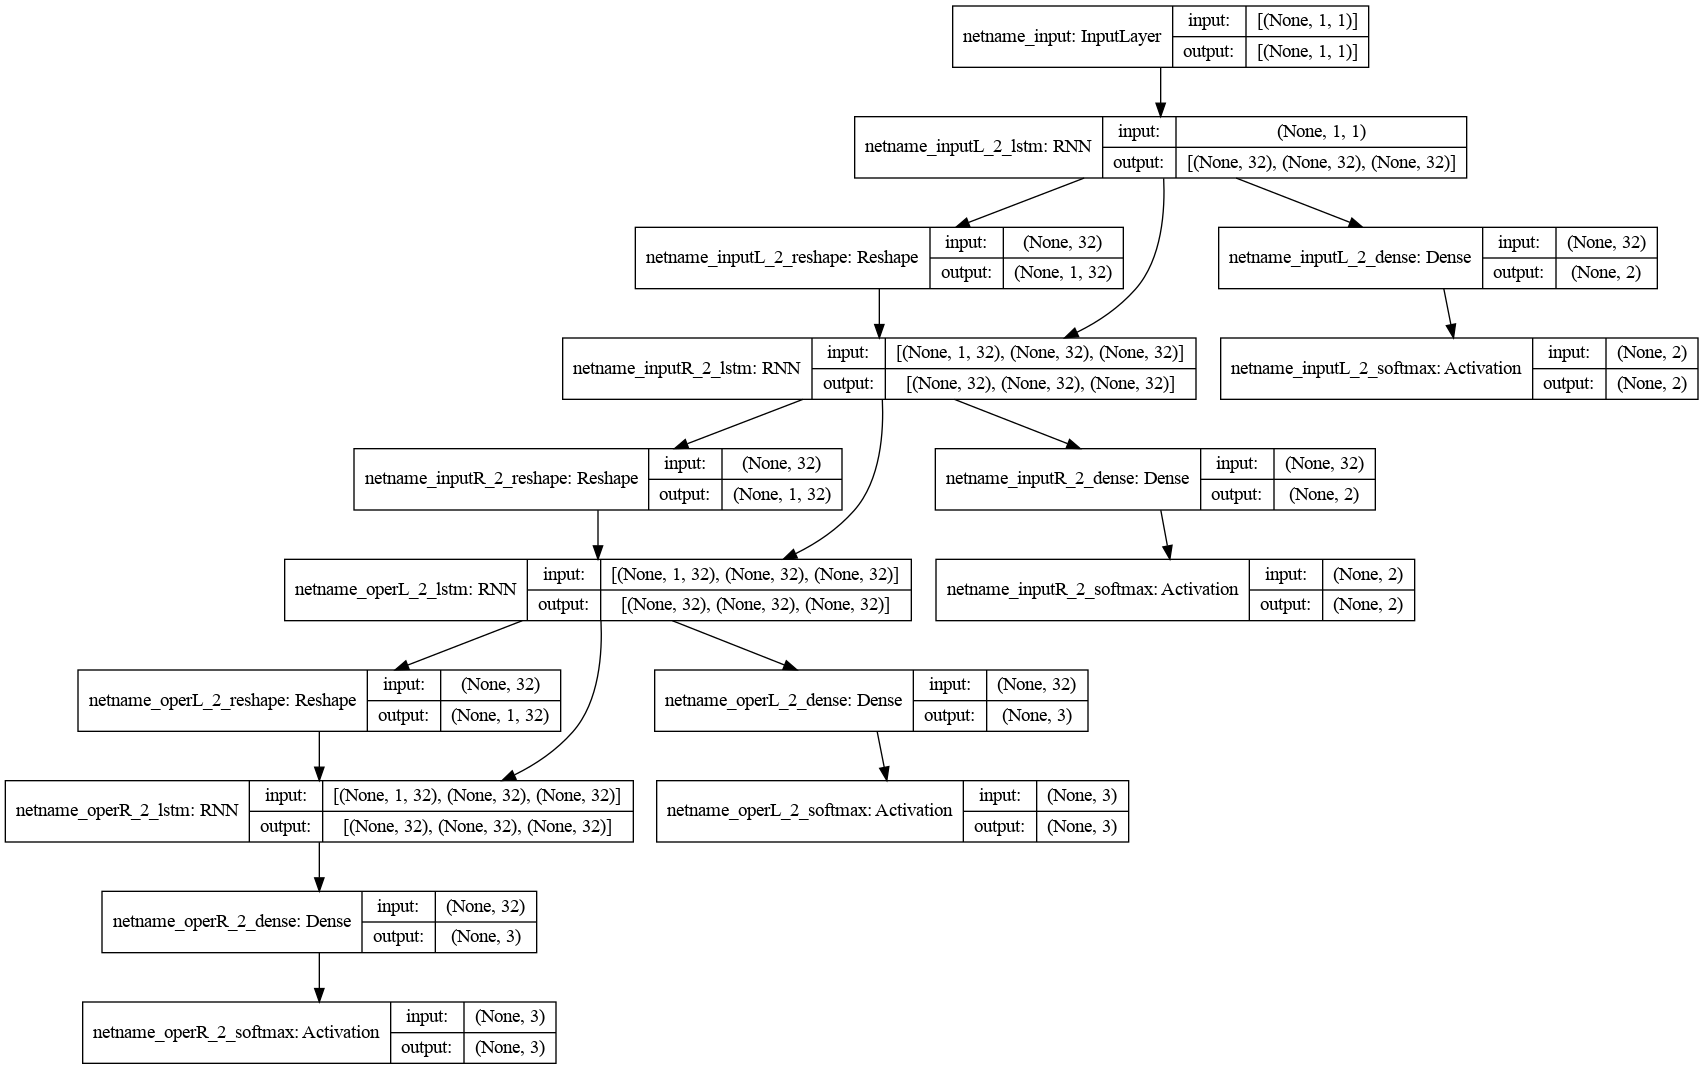

In [23]:
from tensorflow.keras.utils import plot_model

#contr.controller_rnn.summary()
plot_model(contr.controller_rnn, expand_nested=True, show_shapes=True)

# Test LSTM

In [24]:
import tensorflow as tf

import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

inputs = tf.random.normal([32, 10, 8])
lstm = tf.keras.layers.LSTM(4, return_sequences=True, return_state=True)

whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)

print(whole_seq_output.shape, final_memory_state.shape, final_carry_state.shape)

(32, 10, 4) (32, 4) (32, 4)
